# boston

In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [12]:
import numpy as np

In [15]:
from sklearn.model_selection import train_test_split

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

404
102


In [3]:
train_data

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [4]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
mean = train_data.mean(axis=0)
train_data = train_data - mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
std = train_data.std(axis=0)
train_data = train_data / std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data = test_data - mean
test_data = test_data / std


In [5]:
train_data.shape[1]

13

In [16]:
x_train, x_val, y_train, y_val = train_test_split(
    train_data, train_labels, test_size=0.2, random_state=42
)

In [10]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.

model = models.Sequential()
model.add(layers.Input(shape=(13,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='linear'))   


model.summary()

model.compile(
    optimizer='adam',     # 일반적으로 회귀에서도 잘 작동하는 옵티마이저
    loss='mse',           # 회귀용 손실 함수
    metrics=['mae']       # 회귀용 평가 지표
)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [18]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
# [[YOUR CODE]]
history = model.fit(
    x_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(x_val, y_val)
)

Epoch 1/100
11/11 [==============================] - 1s 15ms/step - loss: 591.0922 - mae: 22.3733 - val_loss: 428.9543 - val_mae: 19.4340
Epoch 2/100
11/11 [==============================] - 0s 4ms/step - loss: 542.5936 - mae: 21.2762 - val_loss: 386.5269 - val_mae: 18.3030
Epoch 3/100
11/11 [==============================] - 0s 4ms/step - loss: 484.9955 - mae: 19.9361 - val_loss: 334.9310 - val_mae: 16.8320
Epoch 4/100
11/11 [==============================] - 0s 4ms/step - loss: 412.3356 - mae: 18.1394 - val_loss: 271.8392 - val_mae: 15.0417
Epoch 5/100
11/11 [==============================] - 0s 4ms/step - loss: 325.7858 - mae: 15.7707 - val_loss: 199.7608 - val_mae: 12.7411
Epoch 6/100
11/11 [==============================] - 0s 4ms/step - loss: 227.3639 - mae: 12.8325 - val_loss: 130.4514 - val_mae: 9.9271
Epoch 7/100
11/11 [==============================] - 0s 4ms/step - loss: 141.0508 - mae: 9.6708 - val_loss: 79.1734 - val_mae: 7.5319
Epoch 8/100
11/11 [=========================

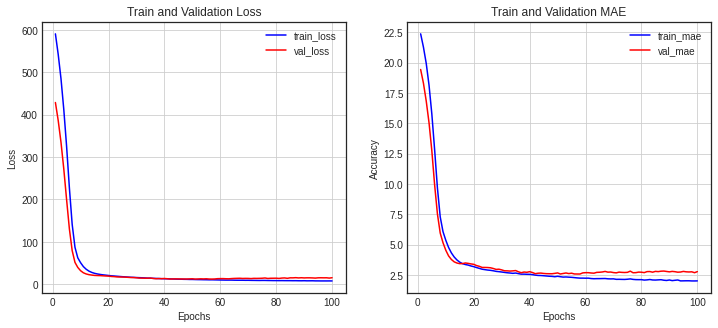

In [19]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [22]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(test_data, test_labels)


4/4 [==============================] - 0s 2ms/step - loss: 26.2943 - mae: 3.0411


[26.294328689575195, 3.0411322116851807]

# Reuters


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [24]:
# reuters 데이터셋 로드
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리
train_data, val_data, train_labels, val_labels = train_test_split(
    train_data, train_labels, test_size=0.25, random_state=42
)


In [25]:
print("훈련 샘플 수:", len(train_data))
print("검증 샘플 수:", len(val_data))
print("테스트 샘플 수:", len(test_data))
print("레이블 클래스 수:", len(set(train_labels)))

훈련 샘플 수: 6736
검증 샘플 수: 2246
테스트 샘플 수: 2246
레이블 클래스 수: 46


In [27]:
from tensorflow.keras.utils import to_categorical

In [28]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dim=10000):
    results = np.zeros((len(data), dim))
    for i, sequence in enumerate(data):
        results[i, sequence] = 1.0
    return results

# 입력 데이터 원-핫 인코딩
x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터 범주형으로 변환
y_train = to_categorical(train_labels)
y_val = to_categorical(val_labels)
y_test = to_categorical(test_labels)

In [32]:
model = models.Sequential()
model.add(layers.Input(shape=10000,))
model.add(layers.Dense(128))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(46, activation='softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 128)               1280128   
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               16512     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
_________________________________________________________________
activation_3 (Activation)    (None, 128)              

In [34]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # 다중 분류 (레이블이 one-hot일 때)
    metrics=['accuracy']
)

In [35]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# 콜백 함수 정의
checkpoint_cb = ModelCheckpoint(
    'best_reuters_model.h5',         # 저장할 파일 이름
    save_best_only=True,             # 가장 성능 좋은 모델만 저장
    monitor='val_loss',              # 검증 손실 기준
    mode='min',                      # 가장 낮은 val_loss를 기준으로 저장
    verbose=1
)

early_stopping_cb = EarlyStopping(
    monitor='val_loss',              # 조기 종료 기준
    patience=5,                      # 5 epoch 동안 개선 없으면 종료
    restore_best_weights=True        # 가장 성능 좋았던 가중치 복원
)

# 모델 학습
history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=512,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/50
14/14 [==============================] - 1s 47ms/step - loss: 3.0787 - accuracy: 0.3018 - val_loss: 3.4396 - val_accuracy: 0.5948

Epoch 00001: val_loss improved from inf to 3.43959, saving model to best_reuters_model.h5
Epoch 2/50
14/14 [==============================] - 0s 16ms/step - loss: 1.8989 - accuracy: 0.5873 - val_loss: 3.0048 - val_accuracy: 0.6576

Epoch 00002: val_loss improved from 3.43959 to 3.00476, saving model to best_reuters_model.h5
Epoch 3/50
14/14 [==============================] - 0s 16ms/step - loss: 1.4753 - accuracy: 0.6666 - val_loss: 2.6386 - val_accuracy: 0.6719

Epoch 00003: val_loss improved from 3.00476 to 2.63857, saving model to best_reuters_model.h5
Epoch 4/50
14/14 [==============================] - 0s 16ms/step - loss: 1.2612 - accuracy: 0.7044 - val_loss: 2.3672 - val_accuracy: 0.6963

Epoch 00004: val_loss improved from 2.63857 to 2.36718, saving model to best_reuters_model.h5
Epoch 5/50
14/14 [==============================] - 0s 15ms/

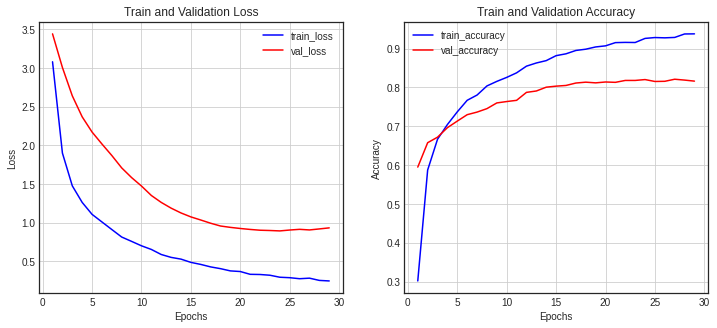

In [36]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

# CIFAR10

In [37]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [38]:
# CIFAR-10 데이터 로드
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

# 훈련 데이터에서 20%를 검증 데이터로 분리
x_train, x_val, y_train, y_val = train_test_split(
    x_train_full, y_train_full, test_size=0.2, random_state=42
)

# 데이터 크기 출력
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

170508288/170498071 [==============================] - 4s 0us/step
전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [39]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

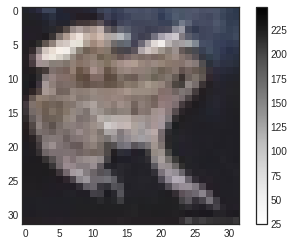

In [40]:
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [41]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [42]:
# 3차원 이미지를 1차원 벡터로 변형: 32 * 32 * 3 = 3072
x_train = x_train.reshape(-1, 32 * 32 * 3)
x_val = x_val.reshape(-1, 32 * 32 * 3)
x_test = x_test.reshape(-1, 32 * 32 * 3)

# 결과 출력
print(x_train.shape)  # 예: (40000, 3072)
print(x_val.shape)    # 예: (10000, 3072)
print(x_test.shape)   # 예: (10000, 3072)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [43]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [46]:

model = models.Sequential()

model.add(layers.Input(shape=(3072,)))

model.add(layers.Dense(2048))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(1024))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(512))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(10, activation='softmax'))  # CIFAR-10: 10개 클래스

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 2048)              6293504   
_________________________________________________________________
batch_normalization_8 (Batch (None, 2048)              8192      
_________________________________________________________________
activation_7 (Activation)    (None, 2048)              0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
batch_normalization_9 (Batch (None, 1024)              4096      
_________________________________________________________________
activation_8 (Activation)    (None, 1024)             

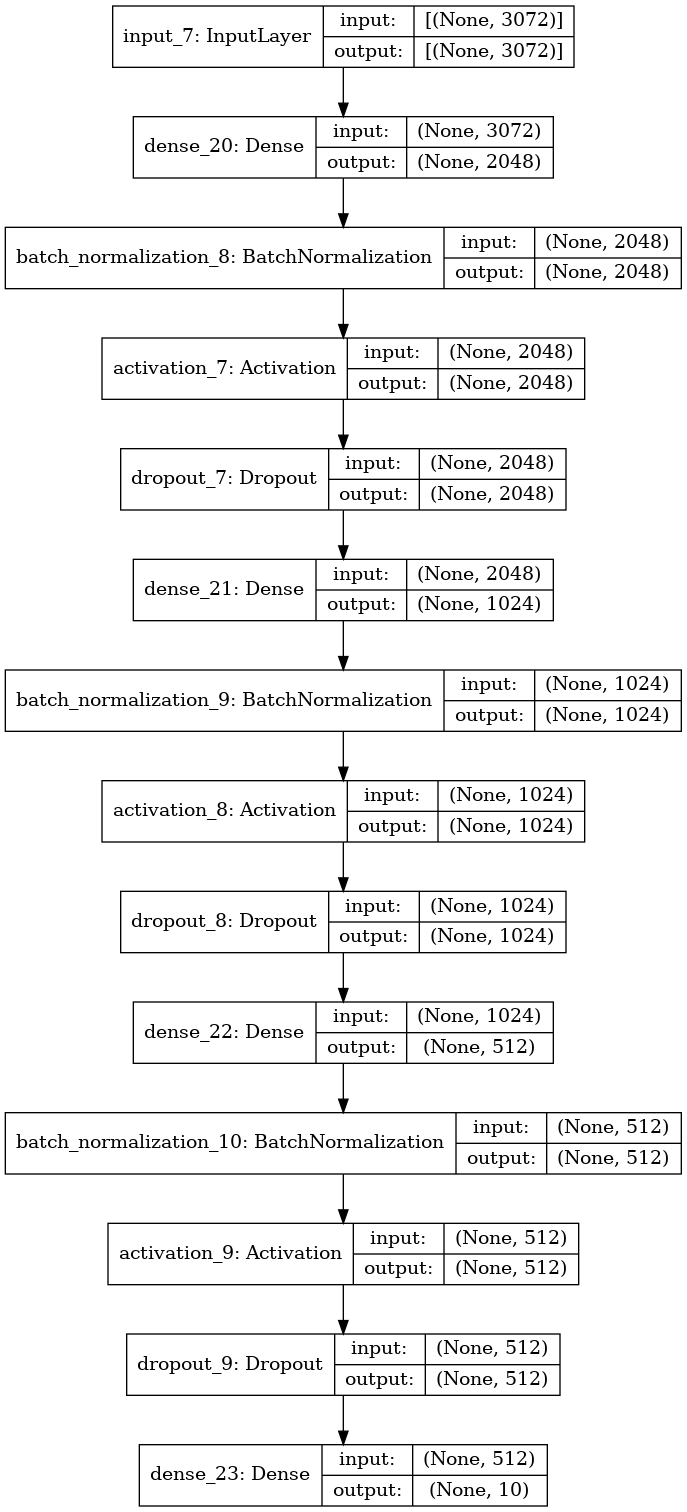

In [47]:
utils.plot_model(model, show_shapes=True)

In [49]:
model.compile(
    optimizer='adam',                            # 일반적으로 잘 작동하는 옵티마이저
    loss='sparse_categorical_crossentropy',      # 정수형 레이블(y_train, y_val 등)이면 sparse 사용
    metrics=['accuracy']                         # 정확도 측정
)

In [50]:

# 콜백 함수 설정
checkpoint_cb = ModelCheckpoint(
    'best_cifar10_model.h5',      # 저장할 모델 파일명
    save_best_only=True,          # 검증 성능이 가장 좋을 때만 저장
    monitor='val_loss',           # 검증 손실 기준
    mode='min',
    verbose=1
)

early_stopping_cb = EarlyStopping(
    monitor='val_loss',           # 검증 손실 기준
    patience=5,                   # 5 에폭 동안 향상 없으면 조기 종료
    restore_best_weights=True     # 가장 좋은 성능의 가중치 복원
)

# 모델 학습
history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=128,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/50
313/313 [==============================] - 4s 9ms/step - loss: 2.0017 - accuracy: 0.3142 - val_loss: 2.0917 - val_accuracy: 0.2469

Epoch 00001: val_loss improved from inf to 2.09174, saving model to best_cifar10_model.h5
Epoch 2/50
313/313 [==============================] - 2s 7ms/step - loss: 1.6616 - accuracy: 0.4075 - val_loss: 1.7527 - val_accuracy: 0.3708

Epoch 00002: val_loss improved from 2.09174 to 1.75269, saving model to best_cifar10_model.h5
Epoch 3/50
313/313 [==============================] - 2s 7ms/step - loss: 1.5477 - accuracy: 0.4452 - val_loss: 1.7214 - val_accuracy: 0.3850

Epoch 00003: val_loss improved from 1.75269 to 1.72136, saving model to best_cifar10_model.h5
Epoch 4/50
313/313 [==============================] - 2s 8ms/step - loss: 1.4844 - accuracy: 0.4657 - val_loss: 1.7306 - val_accuracy: 0.3774

Epoch 00004: val_loss did not improve from 1.72136
Epoch 5/50
313/313 [==============================] - 2s 7ms/step - loss: 1.4324 - accuracy: 0.4853

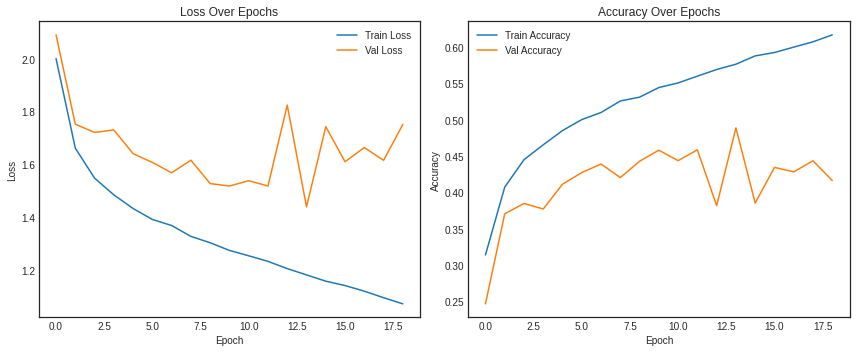

In [51]:
import matplotlib.pyplot as plt

# 학습 결과 시각화
def plot_history(history):
    plt.figure(figsize=(12, 5))

    # 손실(loss) 그래프
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # 정확도(accuracy) 그래프
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# 함수 호출
plot_history(history)

In [52]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.4418 - accuracy: 0.4887


[1.4417674541473389, 0.4887000024318695]